In [ ]:
#dataset loading -> keras CIFAR dataset
import matplotlib.pyplot as plt
from keras.datasets import cifar10

#partition automatic to train and test data sets
(train_x,train_y),(test_x,test_y)= cifar10.load_data()
print("Train: %s,%s",train_x.shape,train_y.shape)
print("Test: %s,%s",test_x.shape,test_y.shape)



Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step
Train: %s,%s (50000, 32, 32, 3) (50000, 1)
Test: %s,%s (10000, 32, 32, 3) (10000, 1)


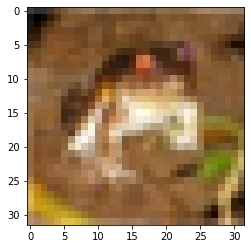

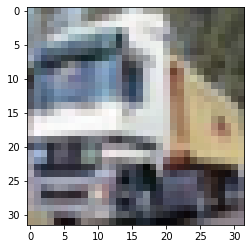

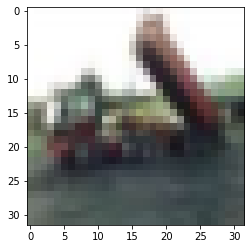

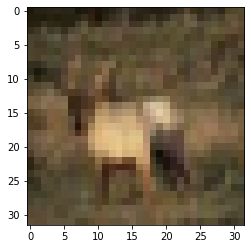

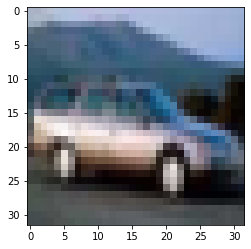

In [ ]:
#Show some of the images from CIFAR dataset
for i in range(5):
  plt.imshow(train_x[i])
  plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import SGD,Adam,Adagrad
from keras.layers import Convolution2D,MaxPooling2D,Dense,Dropout,Flatten,Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [ ]:
#One hot Encoding of data
def ohe_data():
  (train_x,train_y),(test_x,test_y)= cifar10.load_data()
  train_y=to_categorical(train_y)
  test_y=to_categorical(test_y)
  return train_x,train_y,test_x,test_y
#Normalize
def normalize(train_x,test_x):
  train_x_norm=train_x.astype('float32')
  test_x_norm=test_x.astype('float32')
  train_x_norm/=255
  test_x_norm/=255
  train_x,test_x=train_x_norm,test_x_norm
  return train_x,test_x


train_x,train_y,test_x,test_y=ohe_data()
train_x,test_x=normalize(train_x,test_x)


In [ ]:
#model building phase
#VGG like Conv2D model
#Features:  Data Augmentation, Dropout and Batch Normalization
#Convolution2D model :

def build_model():
  model=keras.models.Sequential()
  model.add(keras.layers.Convolution2D(32,(3,3),activation='relu',kernel_initializer='glorot_uniform',padding='same',input_shape=(32,32,3)))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Convolution2D(32,(3,3),activation='relu',kernel_initializer='glorot_uniform',padding='same'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Dropout(0.1))
  model.add(keras.layers.Convolution2D(64,(3,3),activation='relu',kernel_initializer='glorot_uniform',padding='same'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Convolution2D(64,(3,3),activation='relu',kernel_initializer='glorot_uniform',padding='same'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Dropout(0.2))
  
  model.add(keras.layers.Convolution2D(128,(3,3),activation='relu',kernel_initializer='glorot_uniform',padding='same'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Convolution2D(128,(3,3),activation='relu',kernel_initializer='glorot_uniform',padding='same'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Dropout(0.2))
  
  
  model.add(keras.layers.Convolution2D(128,(3,3),activation='relu',kernel_initializer='glorot_uniform',padding='same'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Convolution2D(128,(3,3),activation='relu',kernel_initializer='glorot_uniform',padding='same'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Flatten())
  
  model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='glorot_uniform'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(10,activation='softmax'))
  
  model.compile(keras.optimizers.Adam(learning_rate=1e-3),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

model=build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
#Data Augmentation
#Generator Function for generating scaled/transformed/rotated images
def generate(train_x,train_y,batch_size):
  datagen=ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.1,horizontal_flip=True)
  iterator= datagen.flow(train_x,train_y,batch_size)
  steps=int(train_x.shape[0]/32)
  return steps,iterator




In [ ]:
%load_ext tensorboard
from datetime import datetime

In [ ]:
#Run the model

#1. Get generated data
#2. Fit the model on the generated data
#3. Validate the Model
#4. Visualize in Tensorflow
logdir= "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback=keras.callbacks.TensorBoard(log_dir=logdir)

batch_size=32
steps,iterator=generate(train_x,train_y,batch_size)
model=build_model()
model.fit_generator(iterator,steps_per_epoch=steps,epochs=5,validation_data=(test_x,test_y),verbose=1,callbacks=[tensorboard_callback])
print("Accuracy")
_,acc=model.evaluate(test_x,test_y,verbose=1)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
1562/1562 [==============================] - 533s 341ms/step - loss: 1.5940 - accuracy: 0.4329 - val_loss: 1.6445 - val_accuracy: 0.4554
Epoch 2/5
1562/1562 [==============================] - 522s 334ms/step - loss: 1.1271 - accuracy: 0.6015 - val_loss: 1.0929 - val_accuracy: 0.6251
Epoch 3/5
1562/1562 [==============================] - 518s 332ms/step - loss: 0.9300 - accuracy: 0.6746 - val_loss: 0.8841 - val_accuracy: 0.6935
Epoch 4/5
1562/1562 [==============================] - 516s 330ms/step - loss: 0.8213 - accuracy: 0.7188 - val_loss: 0.7931 - val_accuracy: 0.7319
Epoch 5/5
1562/1562 [==============================] - 509s 326ms/step - loss: 0.7450 - accuracy: 0.7455 - val_loss: 0.7990 - val_accuracy: 0.7345
Accuracy
313/313 [==============================] - 21s 66ms/step - loss: 0.7990 - accuracy: 0.7345
